In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer

In [2]:
plt.rcParams.update({"font.size": 15})

## Raw data

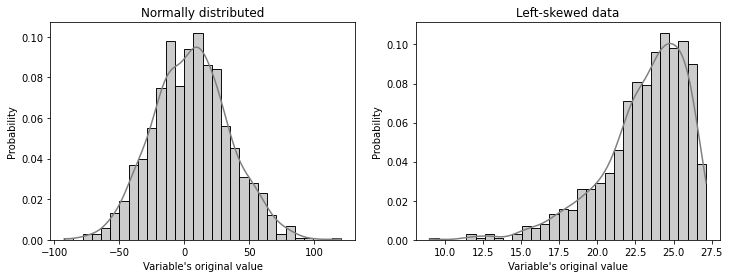

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generating normally distributed data
normal_data = np.random.normal(loc=5, scale=30.0, size=1000)

# Generating left-skewed data by flipping the right-skewed data
left_skewed_data = -np.random.gamma(shape=2, scale=2, size=1000) \
    + np.max(np.random.gamma(shape=2, scale=2, size=1000))

# Create dataframe with simulated data
df_sim = pd.DataFrame({
    'normal': normal_data,
    'left_skewed': left_skewed_data}
)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim.left_skewed, ax=axes[1], color='grey', **hist_params)

axes[0].set_title('Normally distributed')
axes[0].set_xlabel("Variable's original value")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("Variable's original value")

plt.show()

## Standardization

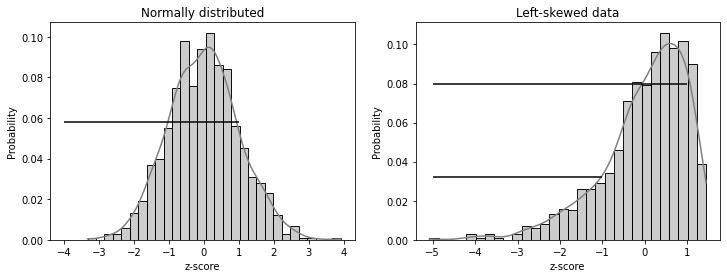

In [4]:
scaler = StandardScaler().set_output(transform="pandas")

df_sim_sc = scaler.fit_transform(df_sim)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim_sc.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim_sc.left_skewed, ax=axes[1], color='grey', **hist_params)

axes[0].hlines(y=0.058, xmin=-4, xmax=1, colors="black", linestyles='solid', clip_on=False)
# axes[0].vlines(x=-1, ymin=0, ymax=0.058, colors="black", linestyles='solid')
# axes[0].vlines(x=1, ymin=0, ymax=0.0, colors="black", linestyles='solid')

axes[1].hlines(y=0.032, xmin=-5, xmax=-1, colors="black", linestyles='solid', clip_on=False)
axes[1].hlines(y=0.08, xmin=-5, xmax=1, colors="black", linestyles='solid', clip_on=False)
# axes[1].vlines(x=-1, ymin=0, ymax=0.032, colors="black", linestyles='solid')
# axes[1].vlines(x=1, ymin=0, ymax=0.08, colors="black", linestyles='solid')


axes[0].set_title('Normally distributed')
axes[0].set_xlabel("z-score")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("z-score")

plt.show()

## MinMaxScaling

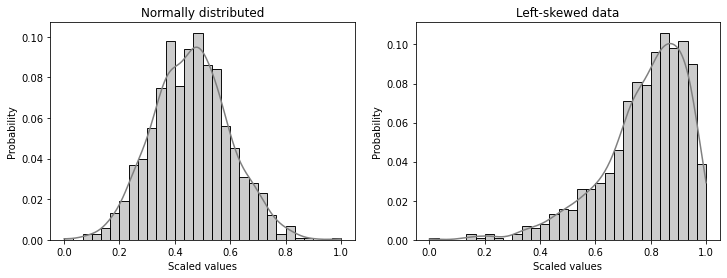

In [5]:
scaler = MinMaxScaler().set_output(transform="pandas")

df_sim_sc = scaler.fit_transform(df_sim)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim_sc.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim_sc.left_skewed, ax=axes[1], color='grey', **hist_params)


axes[0].set_title('Normally distributed')
axes[0].set_xlabel("Scaled values")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("Scaled values")

plt.show()

## Robust scaling

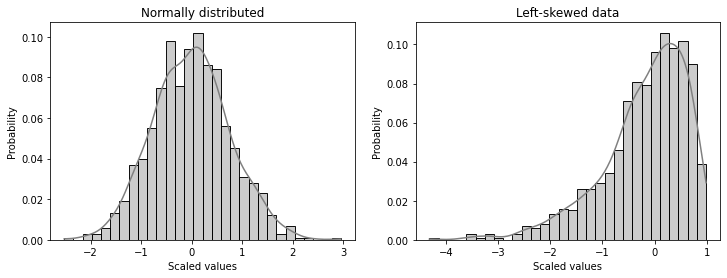

In [6]:
scaler = RobustScaler().set_output(transform="pandas")

df_sim_sc = scaler.fit_transform(df_sim)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim_sc.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim_sc.left_skewed, ax=axes[1], color='grey', **hist_params)


axes[0].set_title('Normally distributed')
axes[0].set_xlabel("Scaled values")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("Scaled values")

plt.show()

## Mean normalization

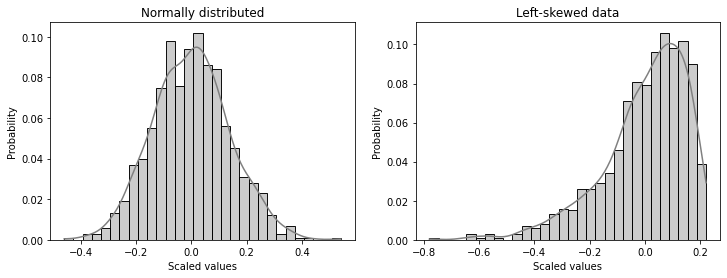

In [7]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(
    with_mean=True, with_std=False).set_output(transform="pandas")

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(
    with_centering=False, with_scaling=True, quantile_range=(0, 100)
).set_output(transform="pandas")

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(df_sim)
scaler_minmax.fit(df_sim)

# transform train and test sets
df_sim_sc = scaler_minmax.transform(scaler_mean.transform(df_sim))

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim_sc.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim_sc.left_skewed, ax=axes[1], color='grey', **hist_params)


axes[0].set_title('Normally distributed')
axes[0].set_xlabel("Scaled values")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("Scaled values")

plt.show()

## Maximum absolute scaling

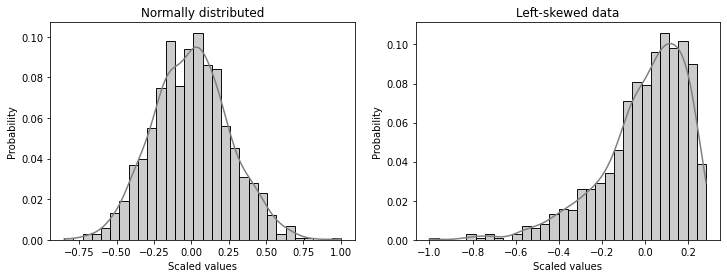

In [8]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

scaler = Pipeline([
    ("scaler_mean", scaler_mean),
    ("scaler_max", scaler_maxabs),
]).set_output(transform="pandas")

df_sim_sc = scaler.fit_transform(df_sim)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim_sc.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim_sc.left_skewed, ax=axes[1], color='grey', **hist_params)


axes[0].set_title('Normally distributed')
axes[0].set_xlabel("Scaled values")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("Scaled values")

plt.show()

## Scaling to vector norm

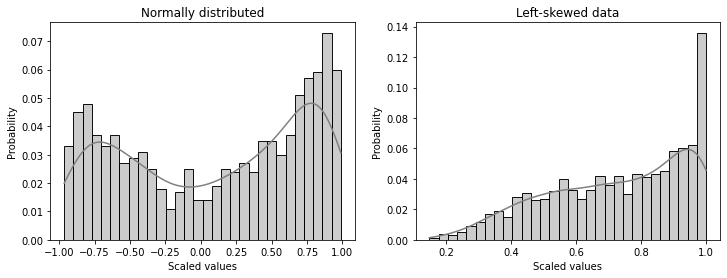

In [9]:
scaler = Normalizer().set_output(transform="pandas")

df_sim_sc = scaler.fit_transform(df_sim)

# Plotting the distributions
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

hist_params = dict(kde=True, bins=30, alpha=0.4, stat="probability")
sns.histplot(df_sim_sc.normal, ax=axes[0], color='grey', **hist_params)
sns.histplot(df_sim_sc.left_skewed, ax=axes[1], color='grey', **hist_params)


axes[0].set_title('Normally distributed')
axes[0].set_xlabel("Scaled values")
axes[1].set_title('Left-skewed data')
axes[1].set_xlabel("Scaled values")

plt.show()